In [1]:
import matplotlib.pyplot as plt
import numpy_ as np
import deepdish as dd
from brian2.only import *
import seaborn as sns

import spatial
import inputs

import conf.isi5_mouse as cfg

In [2]:
res = dd.io.load(cfg.netfile.format(net=10))
X, Y, W = res['X']*meter, res['Y']*meter, res['W']
stimulated_neurons = res['stimulated_neurons']
W[np.isnan(W)] = 0
Xstim, Ystim = spatial.create_stimulus_locations(cfg.params)

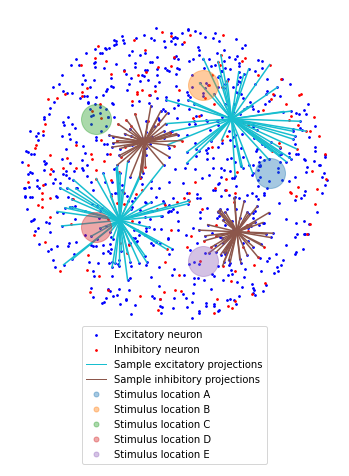

In [3]:
fig, ax = plt.subplots(figsize=(6,8.5))
plt.scatter(X[:cfg.params['N_exc']], Y[:cfg.params['N_exc']], s=3, c='b', label='Excitatory neuron')
plt.scatter(X[cfg.params['N_exc']:], Y[cfg.params['N_exc']:], s=3, c='r', label='Inhibitory neuron')
for i in range(2):
    for j in np.flatnonzero(W[i]):
        plt.plot((X[i], X[j]), (Y[i], Y[j]), c='C9')
for i in range(906,908):
    for j in np.flatnonzero(W[i]):
        plt.plot((X[i], X[j]), (Y[i], Y[j]), c='C5')
plt.plot([], lw=1, c='C9', label='Sample excitatory projections')
plt.plot([], lw=1, c='C5', label='Sample inhibitory projections')

for coords in zip(Xstim, Ystim):
    plt.plot(*coords, 'o', ms=30, alpha=.4)
ax.set_prop_cycle(None)
for label in 'ABCDE':
    plt.plot([], 'o', ms=5, alpha=.4, label=f'Stimulus location {label}')

plt.legend(loc='lower center')

ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-8*mm, 4.5*mm)
sns.despine(left=True, bottom=True)

In [4]:
params = dict(
    sequence_length = 5,
    sequence_count = 2,
    N_stimuli=5,
    fully_random_oddball=True,
    fully_random_msc=True
)
rng = np.random.default_rng(12345678)
sequences = {
    'msc: 20% A, 20% B~E': inputs.create_MSC(None, params, rng),
    'dev: 20% A, 80% B': inputs.create_oddball(None, params, 1, 0, rng),
    'std: 80% A, 20% B': inputs.create_oddball(None, params, 0, 1, rng),
}

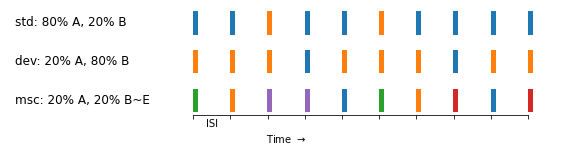

In [5]:
fig, ax = plt.subplots(figsize=(10,2))
for y, (label, seq) in enumerate(sequences.items()):
    y = .5*y
    for x, c in enumerate(seq):
        plt.plot((x+.05,x+.05), (y-.12,y+.12), lw=5, c=f'C{c}')
    plt.text(-4.8, y, label, va='center', size='large')
ax.set_xticks(range(10), ['']*10)
ax.set_xticks([.5], ['ISI'], minor=True)
ax.tick_params(which='minor', length=0)
ax.set_xlabel('Time $\\rightarrow$')
ax.spines['bottom'].set_bounds(0, 9)
ax.set_yticks([])
plt.ylim(-.2, 1.2)
plt.xlim(-5, 10)
sns.despine(left=True)